In [38]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [40]:
# I have loaded the Titanic dataset from a CSV file.
data = pd.read_csv('/content/train.csv')

In [41]:
# I have analyzed the missing values in the dataset by calculating the number of missing values in each column.
print("Missing Values in Each Column:")
missing_values = data.isnull().sum()
print(missing_values)

Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-42-1b4a10c57109>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


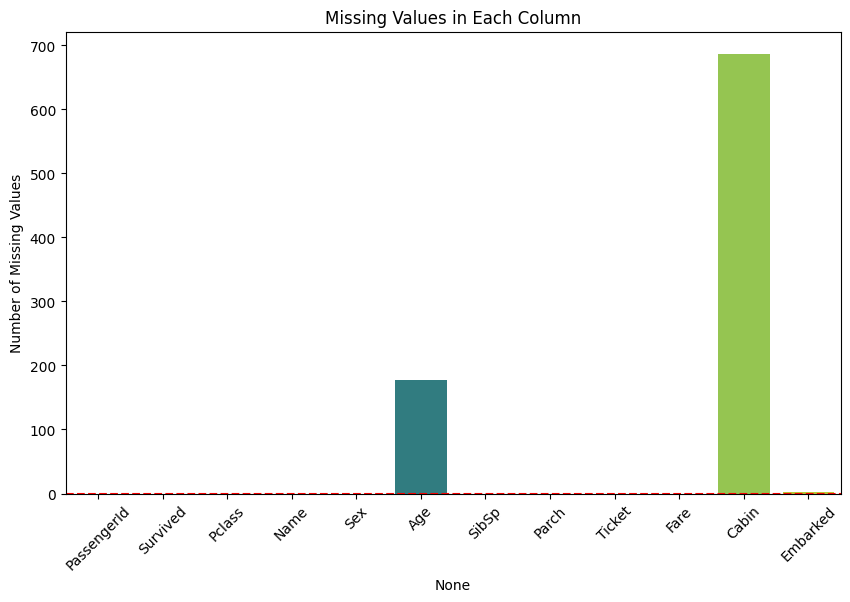

In [42]:
# I have visualized the missing values using a bar plot to provide a clear overview of which columns have missing values.
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.axhline(y=0, color='red', linestyle='--')  # I have added a reference line at zero for clarity.
plt.xticks(rotation=45)
plt.title("Missing Values in Each Column")
plt.ylabel("Number of Missing Values")
plt.show()

In [43]:
# I have handled missing values in the 'Age' column by filling them with the mean value of the column.
# This ensures that the numeric distribution of 'Age' remains consistent after imputation.
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

In [44]:
# I have handled missing values in the 'Fare' column by filling them with the mean value of the column.
# Similar to 'Age', this approach preserves the overall distribution of the 'Fare' feature.
data['Fare'] = imputer.fit_transform(data[['Fare']])

In [45]:
# I have handled missing values in the 'Embarked' column by filling them with the most frequent value ('S').
# Since 'Embarked' is a categorical variable, using the mode (most frequent value) is an appropriate strategy.
data['Embarked'].fillna('S', inplace=True)

<ipython-input-45-151a9d164bcc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S', inplace=True)


In [46]:
# I have confirmed that all missing values have been successfully handled by checking the missing value counts again.
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [47]:
# I have encoded the categorical variables ('Sex' and 'Embarked') into numeric values using LabelEncoder.
# Here, I have fit the LabelEncoder on the entire dataset before splitting it into training and validation sets.
# This ensures that all possible categories are captured during encoding.
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Handle missing values by converting to string
    label_encoders[col] = le  # Save the encoder for later use if needed

In [48]:
# I have prepared the features (X) and target (y) for model training.
# Here, I have dropped irrelevant columns like 'PassengerId', 'Name', 'Ticket', and 'Cabin' to simplify the dataset.
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [49]:
# I have split the dataset into training and validation sets to evaluate the model's performance on unseen data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# I have converted the datasets into DMatrix format, which is optimized for XGBoost computations.
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [51]:
# I have trained an XGBoost model using the processed data.
# The hyperparameters include 'binary:logistic' as the objective function and 'logloss' as the evaluation metric.
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1
}
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'validation')], early_stopping_rounds=10)

[0]	validation-logloss:0.63257
[1]	validation-logloss:0.59429
[2]	validation-logloss:0.56286
[3]	validation-logloss:0.53817
[4]	validation-logloss:0.51816
[5]	validation-logloss:0.50298
[6]	validation-logloss:0.48699
[7]	validation-logloss:0.47502
[8]	validation-logloss:0.46505
[9]	validation-logloss:0.45706
[10]	validation-logloss:0.45123
[11]	validation-logloss:0.44490
[12]	validation-logloss:0.43851
[13]	validation-logloss:0.43563
[14]	validation-logloss:0.43106
[15]	validation-logloss:0.42816
[16]	validation-logloss:0.42655
[17]	validation-logloss:0.42352
[18]	validation-logloss:0.42099
[19]	validation-logloss:0.42116
[20]	validation-logloss:0.41960
[21]	validation-logloss:0.41913
[22]	validation-logloss:0.41763
[23]	validation-logloss:0.41772
[24]	validation-logloss:0.41870
[25]	validation-logloss:0.41793
[26]	validation-logloss:0.41642
[27]	validation-logloss:0.41707
[28]	validation-logloss:0.41777
[29]	validation-logloss:0.41718
[30]	validation-logloss:0.41711
[31]	validation-lo

In [52]:
# I have made predictions on the validation set and evaluated the model's performance using accuracy.
y_pred_prob = bst.predict(dval)
y_pred = (y_pred_prob > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8491620111731844


In [53]:
# I have visualized the distribution of the 'Age' column before and after imputation to assess the impact of the imputation strategy.
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

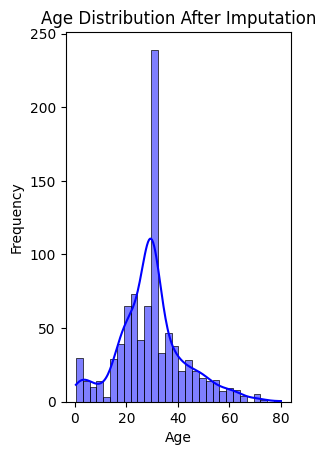

In [54]:
# I have plotted the distribution of 'Age' after imputation to show the filled values.
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution After Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")

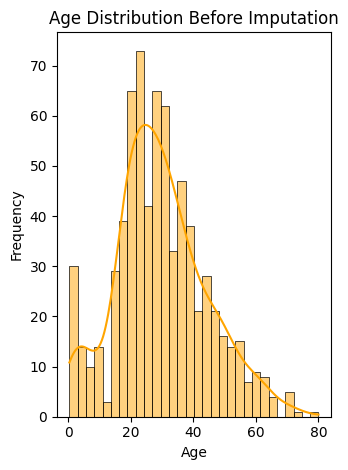

In [55]:
# I have plotted the original distribution of 'Age' to compare it with the imputed distribution.
original_data = pd.read_csv('train.csv')
plt.subplot(1, 2, 2)
sns.histplot(original_data['Age'], bins=30, kde=True, color='orange')
plt.title("Age Distribution Before Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()